In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pprint

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1338, 2378, 3)


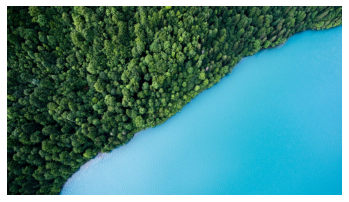

In [3]:
image = cv2.imread('C:/Users/TIRTHA/Downloads/images/a7d2d8ae116f32f8e64ea45e4154bf50.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.axis('off')
plt.imshow(image)


In [4]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
print(modified_image.shape)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
print(modified_image.shape)

(400, 600, 3)
(240000, 3)


In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [26]:
def get_image(image_path):
    image_path=image_path.replace("\\","/")
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(image)
    plt.title("Inserted image : "+image_path.split("/")[-1])
    plt.show()
    return image

In [27]:
def color_extractor(image,number_of_colors,plot_pie=True,plot_cls_c=True):
    # resizing the image to get smaller size of image
    # k-means expect 2d data so reshaping the image
    modified_image_1 = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image_1.reshape(modified_image_1.shape[0]*modified_image_1.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_

    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (plot_pie):
        plt.figure(figsize = (8, 6))
        plt.title("Pie chart of "+str(number_of_colors)+" dominent colors")
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.show()
    if(plot_cls_c):
        plt.figure(figsize = (6, 4))
        plt.title("Ploting clustering centers")
        for i in range(number_of_colors):
            plt.scatter(center_colors[i:i+1, 0], center_colors[i:i+1, 1], c=hex_colors[i], s=200, alpha=0.5, label = hex_colors[i]);
        plt.legend()
        plt.show()
    
        
    dom_color_index=np.argmax(np.array([val for val in counts.values()]))
    result={
        "number_of_colors":number_of_colors,
        "color_values":[val for val in counts.values()],
        "rgb_colors":rgb_colors,
        "hex colors":hex_colors,
        "dominant_color":{"index":dom_color_index,"color_in_rgb":rgb_colors[dom_color_index],"color_in_hex":hex_colors[dom_color_index]}
    }

    return result




C:/Users/TIRTHA/Downloads/images/floral.jpg


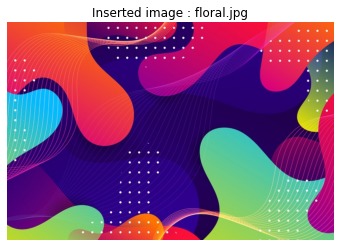

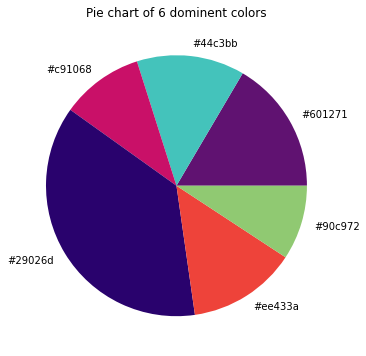

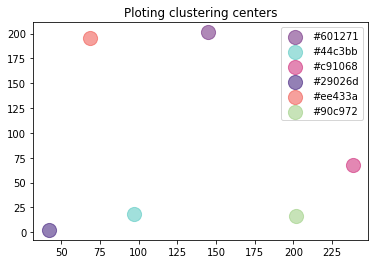

Wall time: 2.71 s


In [32]:
%%time
report=color_extractor(get_image(r"C:\Users\TIRTHA\Downloads\images\floral.jpg"),6,True,True)

In [12]:
pprint.pprint(report)

{'color_values': [129391, 110609],
 'dominant_color': {'color_in_hex': '#4abcd8',
                    'color_in_rgb': array([ 74.9522755 , 188.75958783, 216.97350748]),
                    'index': 0},
 'hex colors': ['#4abcd8', '#24442a'],
 'number_of_colors': 2,
 'rgb_colors': [array([ 74.9522755 , 188.75958783, 216.97350748]),
                array([36.88066324, 68.12402891, 42.7003981 ])]}
